In [1]:
import pandas as pd

In [3]:
newspaper=pd.read_csv('NewspaperData.csv')
newspaper.head()

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns
import statsmodels.formula.api as smf

In [5]:
newspaper.isna().sum()

Newspaper    0
daily        0
sunday       0
dtype: int64

In [6]:
newspaper.describe()

,daily,sunday
count,34.000000,34.000000
mean,430.962471,591.202412
std,269.211470,376.418051
min,133.239000,202.614000
25%,233.021500,327.769500
50%,355.235500,436.712500
75%,516.616500,699.735250
max,1209.225000,1762.015000


In [7]:
newspaper.dtypes

Newspaper     object
daily        float64
sunday       float64
dtype: object

# Assumptions check
# Normality test.

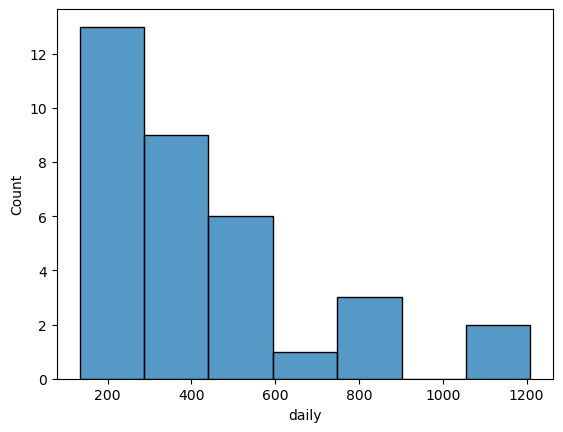

In [9]:
sns.histplot(data=newspaper,x='daily')
plt.show()

In [11]:
import warnings
warnings.filterwarnings('ignore')

<Axes: xlabel='daily', ylabel='Density'>

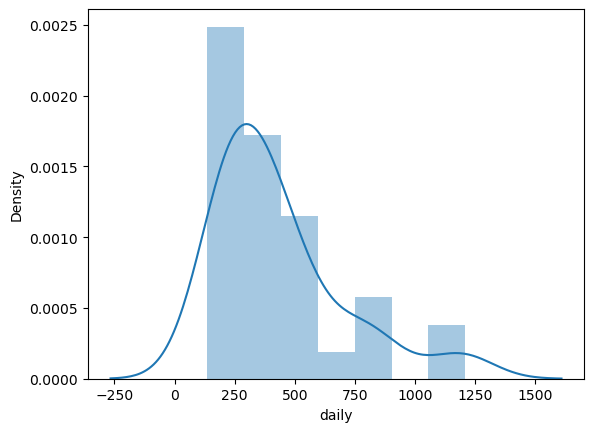

In [12]:
sns.distplot(a=newspaper['daily'])


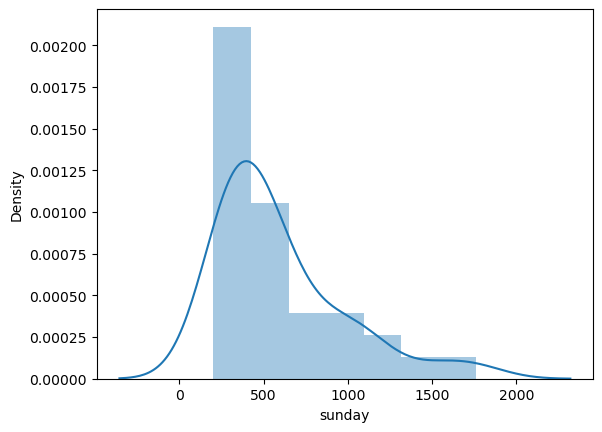

In [13]:
sns.distplot(a=newspaper['sunday'])
plt.show()

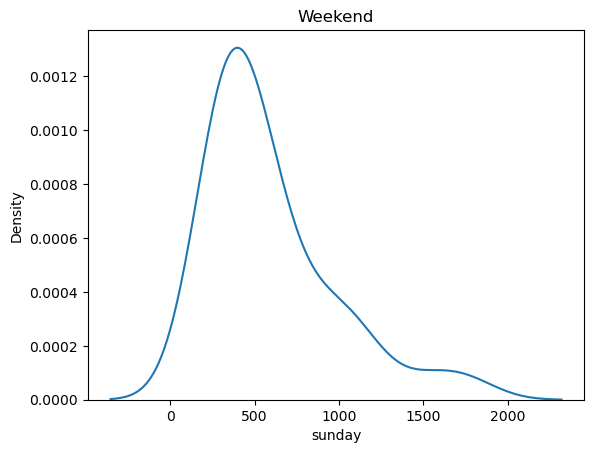

In [15]:
sns.distplot(a=newspaper['sunday'],hist=False)
plt.title('Weekend')
plt.show()

In [17]:
stats.skew(newspaper['daily'])

1.4637180349966803

In [19]:
newspaper['daily'].skew()

1.5321591323040094

In [20]:
newspaper['daily'].kurt()

1.999034084097406

# normality test failed for daily

# test 2 linearity test.

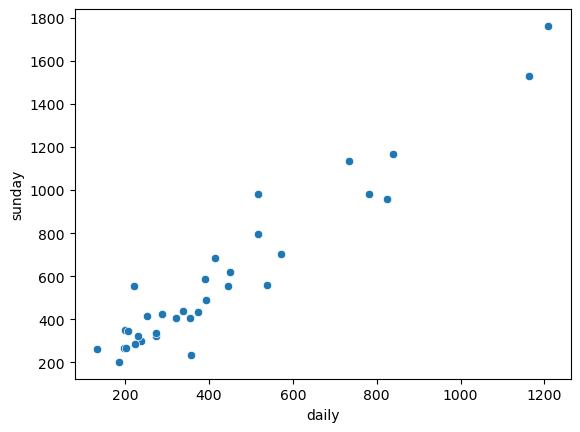

In [21]:
sns.scatterplot(data=newspaper,x='daily',y='sunday')
plt.show()

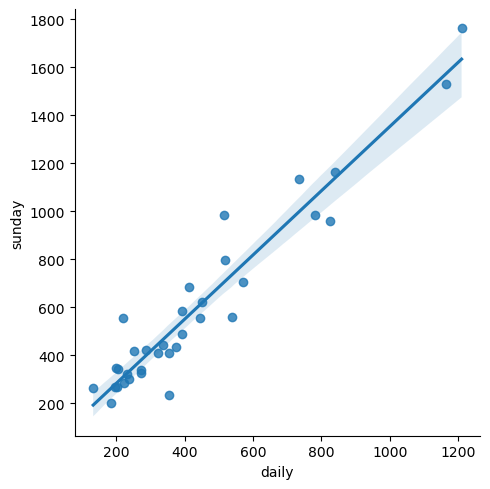

In [22]:
sns.lmplot(data=newspaper,x='daily',y='sunday')
plt.show()

# linearity test also failed

# assumption test  3. multicollinearity.
we cannot perform here as we have only one input feature

# auto regression.
no time based so passed

# Homoscedasticity and zero residual can be performed only after model training.

#  data preparation

In [25]:
newspaper.drop('Newspaper',axis=1,inplace=True)   # another method is use del newspaper['Newspaper']

In [26]:
newspaper.head()

,daily,sunday
0,391.952,488.506
1,516.981,798.298
2,355.628,235.084
3,238.555,299.451
4,537.780,559.093


# model building

# we can do model building by using
1. statsmodels ols(ordinary least square method
2. sklearn linearregressiong( also uses ols)

# using statsmodels.

model buiding and training happens at the same time

In [29]:
linear_model=smf.ols('sunday~daily',data=newspaper).fit()

In [28]:
linear_model.fit()

In [31]:
linear_model.params

Intercept    13.835630
daily         1.339715
dtype: float64

# model testing

In [37]:
test_data=pd.DataFrame(data={'daily':[200,350,420]})

In [38]:
linear_model.predict(test_data)

0    281.778581
1    482.735795
2    576.515828
dtype: float64

# model evaluation

# model deployement

In [39]:
import pickle as pk

In [41]:
from pickle import dump

In [43]:
dump(linear_model,open('model.pkl','wb'))

In [44]:
from pickle import load

In [46]:
loaded_model=load(open('model.pkl','rb'))

# multi linear regression
Mileage prediction

In [3]:
cars=pd.read_csv(r"C:\Users\chana\Downloads\Cars.csv")
cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [48]:
cars.dtypes

HP       int64
MPG    float64
VOL      int64
SP     float64
WT     float64
dtype: object

In [49]:
cars.isna().sum()

HP     0
MPG    0
VOL    0
SP     0
WT     0
dtype: int64

In [50]:
cars.describe()

,HP,MPG,VOL,SP,WT
count,81.000000,81.000000,81.000000,81.000000,81.000000
mean,117.469136,34.422076,98.765432,121.540272,32.412577
std,57.113502,9.131445,22.301497,14.181432,7.492813
min,49.000000,12.101263,50.000000,99.564907,15.712859
25%,84.000000,27.856252,89.000000,113.829145,29.591768
50%,100.000000,35.152727,101.000000,118.208698,32.734518
75%,140.000000,39.531633,113.000000,126.404312,37.392524
max,322.000000,53.700681,160.000000,169.598513,52.997752


# assumptions check

In [51]:
# normality test

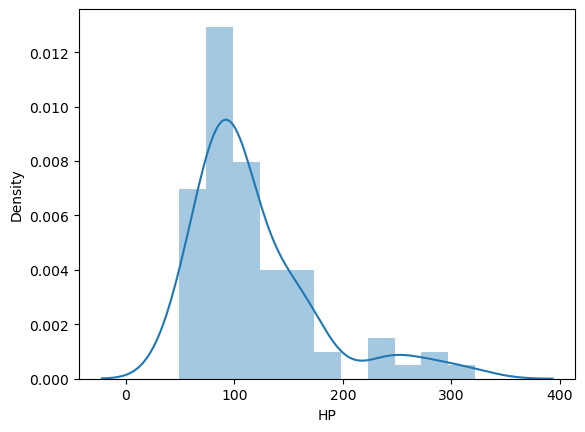

In [52]:
sns.distplot(cars['HP'])
plt.show()

In [53]:
cars['HP'].skew()

1.7162163889158817

In [54]:
cars['HP'].kurt()

2.960024672046334

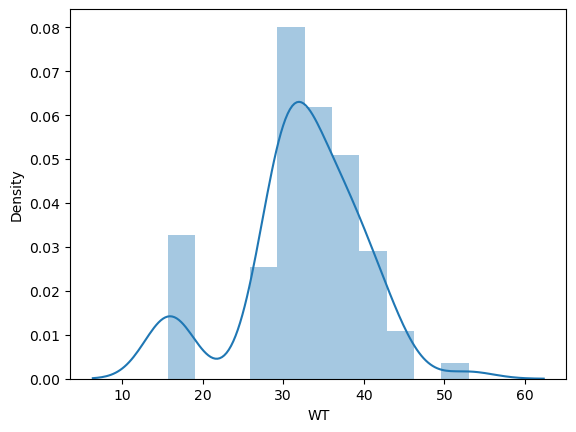

0.9502914910300326

In [55]:
sns.distplot(cars['WT'])
plt.show()

cars['WT'].skew()

cars['WT'].kurt()

# normality test failed

# Linearity test

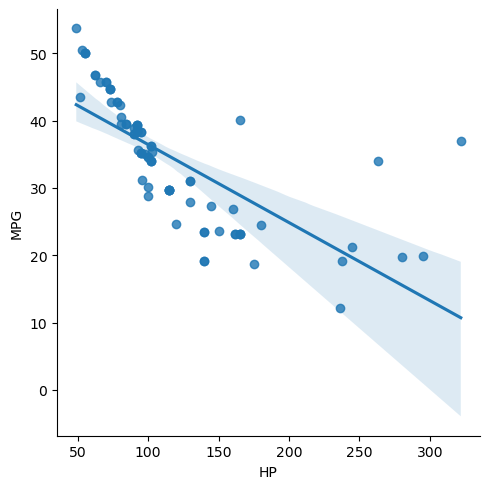

In [56]:
sns.lmplot(data=cars,y='MPG',x='HP')
plt.show()

# linearity test failed

# multicollinearity test

In [58]:
# can use 2 methods
#correlation matrix. 

#variance inflation factor(VIF)

In [60]:
corr_matrix=cars.corr().round(2)

<Axes: >

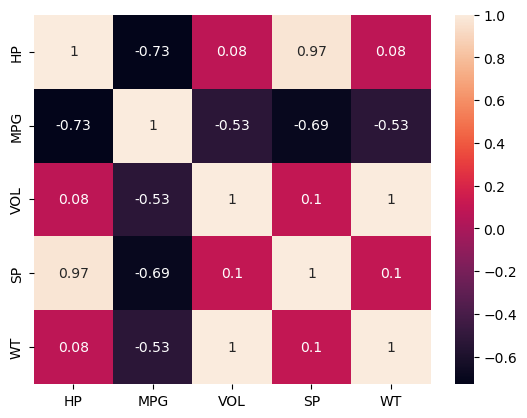

In [61]:
sns.heatmap(corr_matrix,annot=True)

In [62]:
# there is multicollinearity in the data

#  auto regression passed. no time based inputs

# homoscedasticity test and zero residual mean can be done post model training

###  for homoscedatisticity all inputs must be in similar scale

# lets create reference data how features should behave with output y

In [64]:
x=np.random.randn(81)

In [69]:
y=x*10+np.random.randn(81)*2

In [70]:
random_data=pd.DataFrame(data={'x':x,'y':y})

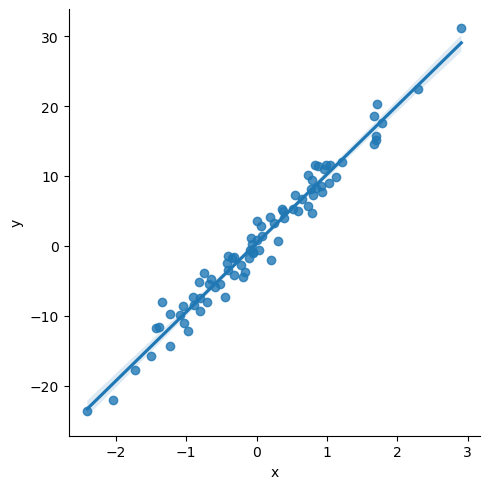

In [71]:
sns.lmplot(data=random_data,x='x',y='y')
plt.show()

In [72]:
# linearity test is passed

<Axes: xlabel='x', ylabel='Density'>

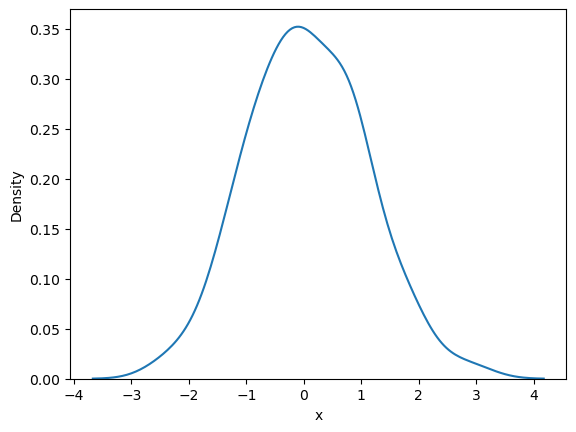

In [75]:
# normality test
sns.distplot(a=random_data['x'],hist=False)

In [76]:
random_data['x'].skew()

0.15568694011886436

In [77]:
random_data['x'].kurt()

0.010688779409912641

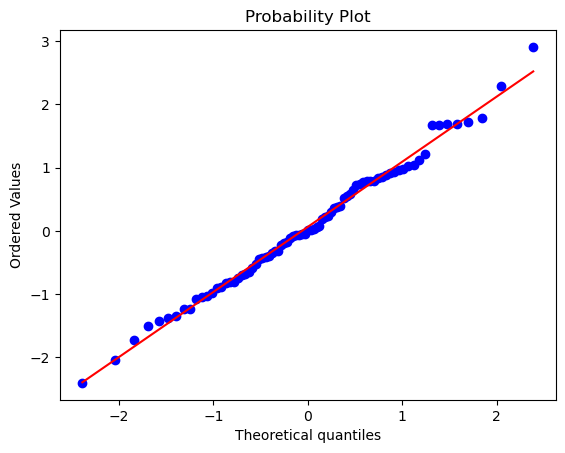

In [79]:
stats.probplot(x=random_data['x'],plot=plt)
plt.show()

In [78]:
# normality test is passed

In [80]:
# model building
from sklearn.linear_model import LinearRegression

In [81]:
linear_model=LinearRegression()

In [83]:
linear_model.fit(X=random_data[['x']],y=random_data[['y']])  # model training

LinearRegression()

In [84]:
linear_model.coef_

array([[9.8510383]])

In [85]:
linear_model.intercept_

array([0.38812123])

In [86]:
# model testing


In [88]:
y_predicted=linear_model.predict(random_data[['x']])

In [90]:
# model evaluation
error=y_predicted-random_data[['y']]

In [91]:
error

,y
0,0.993053
1,1.387296
2,0.961654
3,-2.065663
4,-0.861533
...,...
76,1.067159
77,1.280468
78,-1.429413
79,1.078517


### homoscadesticity and zero residual mean

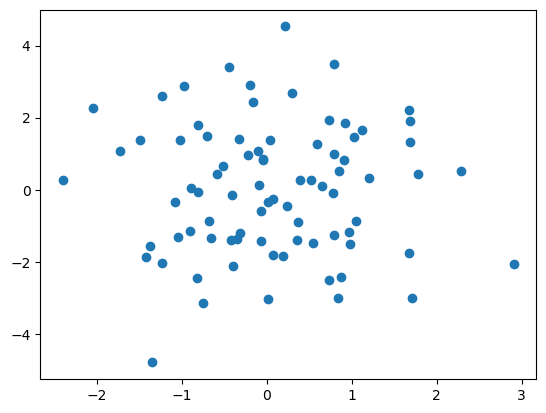

In [92]:
plt.scatter(x=random_data['x'],y=error['y'])
plt.show()                                             # homoscadesticity

In [93]:
# zero residual test
#plot between actual output vs predicted output

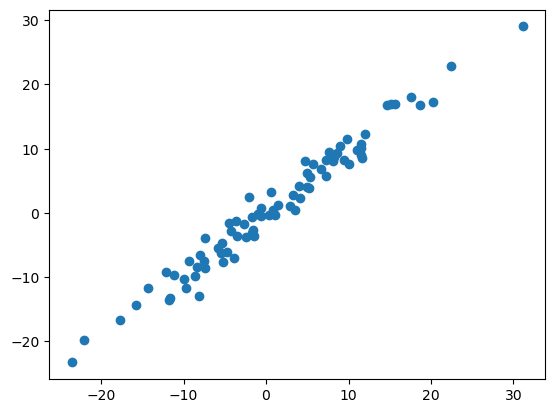

In [96]:
plt.scatter(x=random_data['y'],y=y_predicted)
plt.show()

In [95]:
y_predicted

array([[  8.22328024],
       [ -9.708649  ],
       [ -1.76648698],
       [ 29.03245923],
       [ 10.69421376],
       [-13.2223645 ],
       [  5.54154625],
       [ 12.29434729],
       [  0.7357623 ],
       [  3.32148522],
       [ 16.85190508],
       [  8.17564242],
       [ -7.66265115],
       [ -3.08467663],
       [  6.76465853],
       [-19.7650497 ],
       [  3.87632421],
       [  8.14146353],
       [ -0.09593495],
       [  4.19916015],
       [  1.15805026],
       [ -7.01857424],
       [ 17.02600737],
       [ -0.46835177],
       [ -1.27199866],
       [ -6.5034327 ],
       [-23.29590742],
       [-13.62720244],
       [  8.02785777],
       [ -0.26192285],
       [ -9.86561076],
       [ 10.04975999],
       [ -1.57972989],
       [  4.03308313],
       [ 16.85292294],
       [-12.89120645],
       [ -7.55300105],
       [ 17.031879  ],
       [ -2.82270785],
       [  9.04750603],
       [  7.60945421],
       [ -8.51936213],
       [ -2.73981306],
       [ -0

In [98]:
x_cars=cars.drop('MPG',axis=1)
x_cars

,HP,VOL,SP,WT
0,49,89,104.185353,28.762059
1,55,92,105.461264,30.466833
2,55,92,105.461264,30.193597
3,70,92,113.461264,30.632114
4,53,92,104.461264,29.889149
...,...,...,...,...
76,322,50,169.598513,16.132947
77,238,115,150.576579,37.923113
78,263,50,151.598513,15.769625
79,295,119,167.944460,39.423099


In [117]:
x_cars.columns


Index(['HP', 'VOL', 'SP', 'WT'], dtype='object')

In [110]:
from sklearn.preprocessing import StandardScaler

In [114]:
std=StandardScaler()

In [116]:
x_cars_scaled=std.fit_transform(x_cars)

In [118]:
x_cars_scaled_df=pd.DataFrame(data=x_cars_scaled,columns=x_cars.columns)
x_cars_scaled_df

,HP,VOL,SP,WT
0,-1.206295,-0.440611,-1.231403,-0.490238
1,-1.100587,-0.305252,-1.140871,-0.261299
2,-1.100587,-0.305252,-1.140871,-0.297993
3,-0.836315,-0.305252,-0.573239,-0.239103
4,-1.135823,-0.305252,-1.211826,-0.338878
...,...,...,...,...
76,3.603442,-2.200268,3.409929,-2.186236
77,2.123523,0.732494,2.060245,0.740025
78,2.563975,-2.200268,2.132755,-2.235028
79,3.127754,0.912972,3.292567,0.941462


In [99]:
y_cars=cars[['MPG']]

In [119]:
linear_model2=LinearRegression()
linear_model2.fit(x_cars_scaled_df,y_cars)

LinearRegression()

In [120]:
linear_model2.coef_

array([[-11.66095549,  -7.44803145,   5.57581553,   2.98284187]])

In [121]:
linear_model2.intercept_

array([34.42207573])

In [126]:
#MOdel testing
y_predict=linear_model2.predict(x_cars_scaled_df)

In [127]:
y_predict


array([[43.44193477],
       [42.38879289],
       [42.27934147],
       [42.53835981],
       [42.17264802],
       [43.02061916],
       [42.32536062],
       [48.07621852],
       [48.28120247],
       [40.79122814],
       [41.52153227],
       [47.80956747],
       [39.95980269],
       [41.52757889],
       [41.76632332],
       [41.6181448 ],
       [41.15094046],
       [47.98605515],
       [41.30861046],
       [37.87127922],
       [38.57706414],
       [37.35199705],
       [37.89770285],
       [39.5625144 ],
       [39.93380662],
       [46.73870908],
       [35.48165898],
       [38.78152504],
       [38.24861192],
       [36.00285298],
       [34.84603989],
       [37.21630246],
       [37.13919796],
       [34.82541399],
       [37.22361389],
       [37.53950097],
       [39.27144845],
       [38.24219888],
       [38.54286458],
       [35.9391722 ],
       [34.2129755 ],
       [35.36313259],
       [37.50473376],
       [38.07998482],
       [35.79651664],
       [36

In [128]:
error_cars=y_cars-y_predict


In [129]:
error_cars

,MPG
0,10.258747
1,7.624608
2,7.734060
3,3.157963
4,8.331584
...,...
76,15.617904
77,1.298838
78,7.863547
79,7.517122


# homoscadesticity check

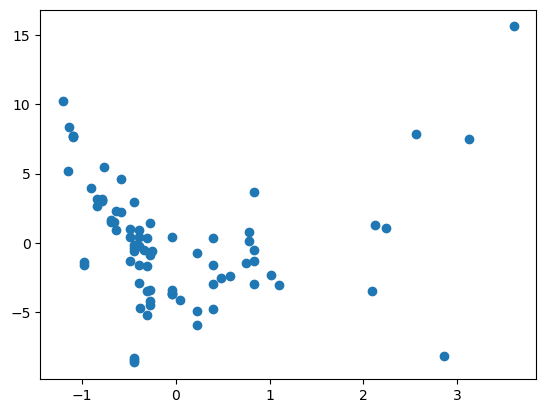

In [130]:
plt.scatter(x=x_cars_scaled_df['HP'],y=error_cars['MPG'])

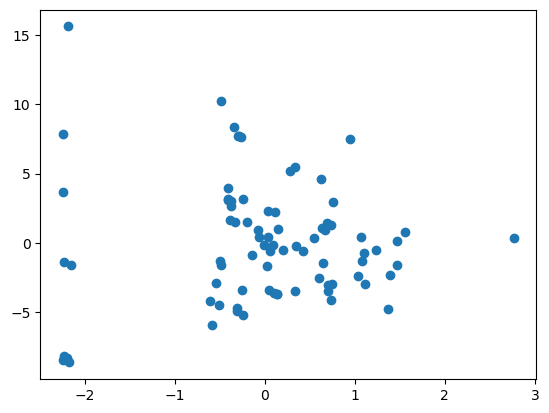

In [131]:
plt.scatter(x=x_cars_scaled_df['WT'],y=error_cars['MPG'])

# No homoscadesticity 

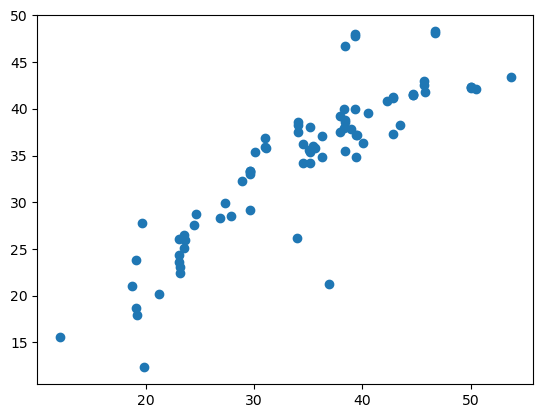

In [133]:
plt.scatter(x=cars['MPG'],y=y_predict)

In [134]:
import sweetviz as sw

In [135]:
cars_sw_report=sw.analyze(cars)
cars_sw_report.show_html('cars.html')

                                             |                                             | [  0%]   00:00 ->…

Report cars.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [136]:
import pandas_profiling

ImportError: cannot import name 'DataError' from 'pandas.core.base' (D:\datascience\anaconda\Lib\site-packages\pandas\core\base.py)

In [137]:
!pip install ydata-profiling

  Obtaining dependency information for ydata-profiling from https://files.pythonhosted.org/packages/09/98/5a5fbfd48bf23acd3ceed5114d073b877965816304078151fefbf86d8458/ydata_profiling-4.5.1-py2.py3-none-any.whl.metadata
  Using cached ydata_profiling-4.5.1-py2.py3-none-any.whl.metadata (20 kB)
  Using cached visions-0.7.5-py3-none-any.whl (102 kB)
  Obtaining dependency information for wordcloud>=1.9.1 from https://files.pythonhosted.org/packages/34/ac/72a4e42e76bf549dfd91791a6b10a9832f046c1d48b5e778be9ec012aa47/wordcloud-1.9.2-cp311-cp311-win_amd64.whl.metadata
  Using cached wordcloud-1.9.2-cp311-cp311-win_amd64.whl.metadata (3.4 kB)
  Obtaining dependency information for dacite>=1.8 from https://files.pythonhosted.org/packages/21/0f/cf0943f4f55f0fbc7c6bd60caf1343061dff818b02af5a0d444e473bb78d/dacite-1.8.1-py3-none-any.whl.metadata
  Using cached dacite-1.8.1-py3-none-any.whl.metadata (15 kB)
Using cached ydata_profiling-4.5.1-py2.py3-none-any.whl (357 kB)
Using cached dacite-1.8.1-py

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires visions[type_image_path]==0.7.4, but you have visions 0.7.5 which is incompatible.


In [138]:
from ydata_profiling import ProfileReport

In [139]:
cars_pr_report=ProfileReport(cars)

In [143]:
cars_pr_report.to_file('cars.pr.html')


Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# model optimization techniques

In [4]:
cars

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


In [6]:
model=smf.ols('MPG~HP+VOL+SP+WT',data=cars).fit()

In [7]:
model.params

Intercept    30.677336
HP           -0.205444
VOL          -0.336051
SP            0.395627
WT            0.400574
dtype: float64

In [8]:
model.pvalues              # Ho is not significant
                          # Ha this is a significant feature.

Intercept    0.042936
HP           0.000001
VOL          0.556294
SP           0.014579
WT           0.813649
dtype: float64